In [1]:
import numpy as np
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = make_classification(n_samples = 100, n_features = 2, n_classes = 2, n_redundant=0)
X = data[0]
y = data[1]
print(X.shape, y.shape)

(100, 2) (100,)


In [2]:


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calcGrad(actual, pred):
    return pred - actual



In [306]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = StandardScaler().fit_transform(iris["data"])
y = (iris["target"] == 0).astype(np.int64)
print(y, X.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] (150, 4)


In [307]:
print(X[1,].shape, w.shape, 1/ (1 + np.exp(-(np.dot(w, X[1,].T) + b))))
print(sigmoid(7.7 * -0.3020915 + 3 *0.19960663+6.1*0.36191744+2.3*-0.5435986 + b))

(4,) (1, 4) [0.4898372]
[0.31370484]


In [353]:
# initialise values
w = np.random.randn(1, X.shape[1])
b = np.random.randn(1)
lr = 0.003
epochs = 300000
print(w, b)
records = np.zeros((epochs, X.shape[1] + 1))
records[0,:] = np.hstack([w.flatten(), b])

for i in range(epochs):

    # shuffle array
    # np.random.shuffle(X)

    # predict
    z = sigmoid(np.dot(w, X.T) + b)

    # calc gradient
    dz = calcGrad(y, z)
    dw = np.dot(X.T,  dz.T) / 150
    db = np.sum(dz) / 150
    # print(dz.shape, dw.shape, db.shape)
    # update values
    w += -lr * dw.T
    b += -lr * db

    records[i,:] = np.hstack([w.flatten(), b])


print(w, b)


[[-0.35587909  0.35212242  0.20692168  0.15856424]] [-0.57596817]
[[ 0.30947666  0.01687354 -0.6482898   0.30444221]] [-0.69929457]


In [351]:
import statsmodels.api as sm

X_intercept = np.hstack([np.ones(( X.shape[0], 1)),X])

log_reg = sm.Logit(y, X_intercept).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.632289
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  150
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                            4
Date:                Sat, 05 Nov 2022   Pseudo R-squ.:                0.006639
Time:                        10:44:01   Log-Likelihood:                -94.843
converged:                       True   LL-Null:                       -95.477
Covariance Type:            nonrobust   LLR p-value:                    0.8668
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6994      0.174     -4.013      0.000      -1.041      -0.358
x1             0.3139      0.

In [326]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 1, max_iter = 99999,fit_intercept = True, penalty = 'none')
log_reg.fit(X, y)
print(log_reg.coef_, log_reg.intercept_)


[[-1.36507114  0.33518742  1.95423232 -0.4026498 ]] [-0.74402127]


<AxesSubplot:>

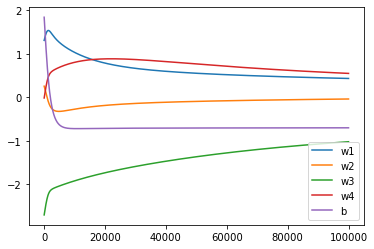

In [352]:
df = pd.DataFrame(records).rename(columns = {0:'w1', 1:'w2', 2:'w3', 3: "w4", 4: "b"})

df.plot()